In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [10]:
filename = 'data/lens_z_omlambda_0.0.csv'
df = pd.read_csv(filename)
df.head()

,lens_z,percentage_err,step
0,0.050000,-0.004016,5.000000e-08
1,0.051515,-0.004006,5.000000e-08
2,0.053030,-0.004476,5.000000e-08
3,0.054545,-0.006538,5.000000e-08
4,0.056061,-0.004375,5.000000e-08


In [11]:
df.drop_duplicates(inplace=True)

In [13]:
stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
stats

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
1.000000e-08,-0.006226,0.003245,100,0.000325
3.000000e-08,-0.005832,0.003312,100,0.000331
3.250000e-08,-0.005899,0.003298,100,0.000330
5.000000e-08,-0.005853,0.003432,100,0.000343
5.500000e-08,-0.005831,0.003366,100,0.000337
6.000000e-08,-0.005557,0.003391,100,0.000339
7.750000e-08,-0.005791,0.003418,100,0.000342
1.000000e-07,-0.004533,0.003440,100,0.000344
1.090909e-07,-0.004682,0.003806,100,0.000381


In [20]:
# stats[stats['percentage_err mean'].abs() == stats['percentage_err mean'].abs().min()]
best_step_size = stats['percentage_err mean'].abs().idxmin()
print("This is the step size that gives the most accurate result: ", best_step_size)

This is the step size that gives the most accurate result:  6.12244897959e-07


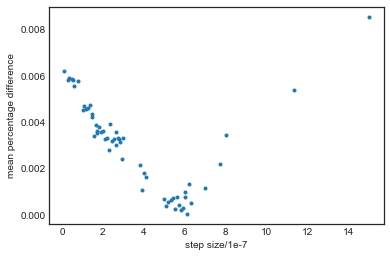

In [5]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('mean percentage difference')

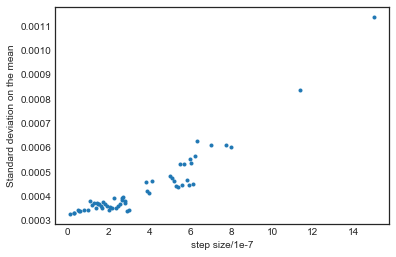

In [6]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('Standard deviation on the mean')

In [7]:
filename = 'data/mass_omlambda_0.0.csv'
df = pd.read_csv(filename)
df.drop_duplicates(inplace=True)
stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
stats

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
1.000000e-07,-0.004784,0.002407,100,0.000241
2.000000e-07,-0.003535,0.002886,100,0.000289
3.000000e-07,-0.002601,0.002858,100,0.000286
4.000000e-07,-0.002587,0.002573,100,0.000257
5.000000e-07,-0.001312,0.003358,100,0.000336
6.250000e-07,-0.000321,0.003678,100,0.000368
7.500000e-07,0.001466,0.003822,100,0.000382
8.750000e-07,0.001206,0.004636,100,0.000464


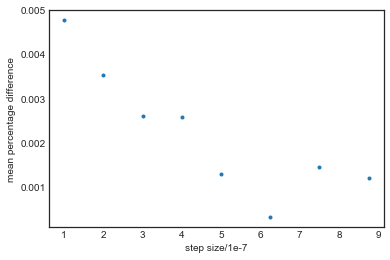

In [8]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('mean percentage difference')

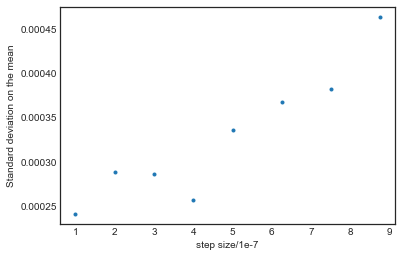

In [9]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('Standard deviation on the mean')